# Challenge - Telecom X - parte 2

## 1 - Preparação dos Dados

### 1.1 - Extração do Arquivo Tratado

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso19_challenge_telecomX_analise_evasao_clientes_parte2\\dados_tratados.csv')

In [3]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0.0,Female,False,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0.0,Male,False,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1.0,Male,False,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1.0,Male,True,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,True,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### 1.2 - Remoção de Colunas Irrelevantes

A base de dados importada já estava sem a coluna customerID

### 1.3 - Encoding

1.3.1 - Identificar as colunas categóricas

In [4]:
colunas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

1.3.2 - Aplicar get_dummies()

In [5]:
# Codifica variáveis categóricas (drop_first=True para evitar multicolinearidade)
dados_encoded = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

1.3.3 - Verificação da Proporção de Evasão

Proporção de clientes:
Ativos (Churn = 0): 73.5%
Evadidos (Churn = 1): 26.5%


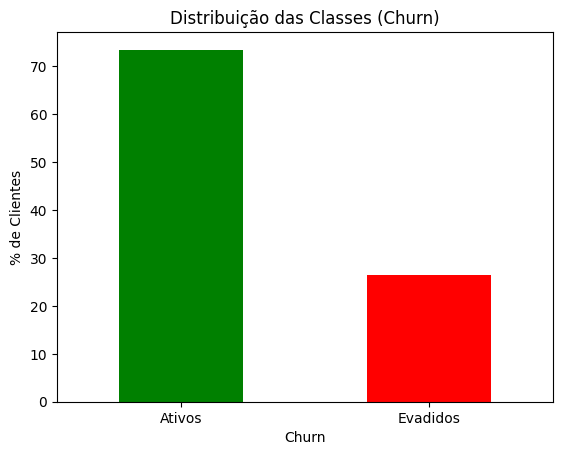

In [7]:
# Verificar a proporção de clientes que evadiram (Churn = 1) vs. ativos (Churn = 0)
y = dados['Churn']
proporcao_churn = y.value_counts(normalize=True).round(3) * 100

print("Proporção de clientes:")
print(f"Ativos (Churn = 0): {proporcao_churn[0]}%")
print(f"Evadidos (Churn = 1): {proporcao_churn[1]}%")

# Visualização com gráfico
import matplotlib.pyplot as plt

proporcao_churn.plot(kind='bar', color=['green', 'red'])
plt.xticks(ticks=[0, 1], labels=['Ativos', 'Evadidos'], rotation=0)
plt.title('Distribuição das Classes (Churn)')
plt.ylabel('% de Clientes')
plt.show()


1.3.4 - Balanceamento de Classes (opcional)

Seria necessário se a proporção de churn for muito baixa, algo como Ativos (Churn = 0): 90% / Evadidos (Churn = 1): 10%, mas como obtivemos valores mais altos, não será necessário.

1.3.5 - Normalização ou Padronização (se necessário)

Vamos pular essa etapa porque vamos usar Random Forest agora.